In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Normalization
import tensorflow as tf

In [2]:
#data augmentation for AD images
import os
from PIL import Image
import random

# Define the input folder containing images
input_folder = "AD"

# Define the output folder to save the modified images
output_folder = "AD_augmented"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# List all files in the input folder
image_files = os.listdir(input_folder)

# Process each image
for image_file in image_files:
    # Load the image
    image_path = os.path.join(input_folder, image_file)
    image = Image.open(image_path)

    # Apply horizontal flipping
    flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)

    # Apply shearing with a random angle within the range of -0.2 to 0.2
    shear_angle = random.uniform(-0.2, 0.2)
    sheared_image = image.transform(image.size, Image.AFFINE, (1, shear_angle, 0, 0, 1, 0))

    # Apply shifting with a random offset within the range of -0.1 to 0.1
    shift_x = random.uniform(-0.1, 0.1) * image.width
    shift_y = random.uniform(-0.1, 0.1) * image.height
    shifted_image = image.transform(image.size, Image.AFFINE, (1, 0, shift_x, 0, 1, shift_y))

    zoom_factor = random.uniform(0.8, 1.2)

    # Calculate the new dimensions after zooming
    new_width = int(image.width * zoom_factor)
    new_height = int(image.height * zoom_factor)

    # Calculate the cropping box
    left = (image.width - new_width) // 2
    top = (image.height - new_height) // 2
    right = left + new_width
    bottom = top + new_height

    # Crop the zoomed portion
    zoomed_image = image.crop((left, top, right, bottom))

    

    # Apply rotation with 15 degrees
    rotated_image = image.rotate(15)


# Save the modified image
    image.save(os.path.join(output_folder, f"{image_file}_original.jpg"))
    flipped_image.save(os.path.join(output_folder, f"{image_file}_flipped.jpg"))
    sheared_image.save(os.path.join(output_folder, f"{image_file}_sheared.jpg"))
    shifted_image.save(os.path.join(output_folder, f"{image_file}_shifted.jpg"))
    rotated_image.save(os.path.join(output_folder, f"{image_file}_rotated.jpg"))

# Print a success message
print(f"Modified images saved in {output_folder}")


Modified images saved in AD_augmented


In [4]:
#data augmentation for MCI images

import os
from PIL import Image
import random

# Define the input folder containing images
input_folder = "MCI"

# Define the output folder to save the modified images
output_folder = "MC_augmented"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# List all files in the input folder
image_files = os.listdir(input_folder)

# Process each image
for image_file in image_files:
    # Load the image
    image_path = os.path.join(input_folder, image_file)
    image = Image.open(image_path)

    # Apply horizontal flipping
    flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)

    # Apply shearing with a random angle within the range of -0.2 to 0.2
    shear_angle = random.uniform(-0.2, 0.2)
    sheared_image = image.transform(image.size, Image.AFFINE, (1, shear_angle, 0, 0, 1, 0))

    # Apply shifting with a random offset within the range of -0.1 to 0.1
    shift_x = random.uniform(-0.1, 0.1) * image.width
    shift_y = random.uniform(-0.1, 0.1) * image.height
    shifted_image = image.transform(image.size, Image.AFFINE, (1, 0, shift_x, 0, 1, shift_y))

    # Apply rotation with 15 degrees
    rotated_image = image.rotate(15)

    # Save the modified image
    image.save(os.path.join(output_folder, f"{image_file}_original.jpg"))
    flipped_image.save(os.path.join(output_folder, f"{image_file}_flipped.jpg"))
    sheared_image.save(os.path.join(output_folder, f"{image_file}_sheared.jpg"))
    shifted_image.save(os.path.join(output_folder, f"{image_file}_shifted.jpg"))
    rotated_image.save(os.path.join(output_folder, f"{image_file}_rotated.jpg"))
#     zoomed_image.save(os.path.join(output_folder, f"{image_file}_zoomed.jpg"))

# Print a success message
print(f"Modified images saved in {output_folder}")


Modified images saved in MC_augmented


In [3]:
#before data augmentations
import os
import cv2
import numpy as np
from PIL import Image
datasets_before_augmentation = []
labels_no_augmentation =[]
AD_images = os.listdir("AD")
MCI_images = os.listdir("MCI")

for i ,image_name in enumerate(AD_images):
    if(image_name.split('.')[1]=='jpg'):
        image =cv2.imread("AD/"+ image_name)
        image = Image.fromarray(image,"RGB")
        image = image.resize((64,64))
        datasets_before_augmentation.append(np.array(image))
        labels_no_augmentation.append(1)
        
        
for i ,image_name in enumerate(MCI_images):
    if(image_name.split('.')[1]=='jpg'):
        image =cv2.imread("MCI/"+ image_name)
        image = Image.fromarray(image,"RGB")
        image = image.resize((64,64))
        datasets_before_augmentation.append(np.array(image))
        labels_no_augmentation.append(0)


In [4]:
import os
import cv2
import numpy as np
from PIL import Image
datasets = []
label =[]
AD_images = os.listdir("AD_augmented")
MCI_images = os.listdir("MC_augmented")

for i ,image_name in enumerate(AD_images):
    if(image_name.split('.')[2]=='jpg'):
        image =cv2.imread("AD_augmented/"+ image_name)
        image = Image.fromarray(image,"RGB")
        image = image.resize((64,64))
        datasets.append(np.array(image))
        label.append(1)
        
        
for i ,image_name in enumerate(MCI_images):
    if(image_name.split('.')[2]=='jpg'):
        image =cv2.imread("MC_augmented/"+ image_name)
        image = Image.fromarray(image,"RGB")
        image = image.resize((64,64))
        datasets.append(np.array(image))
        label.append(0)


In [5]:
labels= np.array(label)
data = np.array(datasets)
labels_with_no_augmentation =np.array(labels_no_augmentation)
labels_with_no_augmentation.shape

(1654,)

In [6]:
x =  data / 255.0  #normalization data

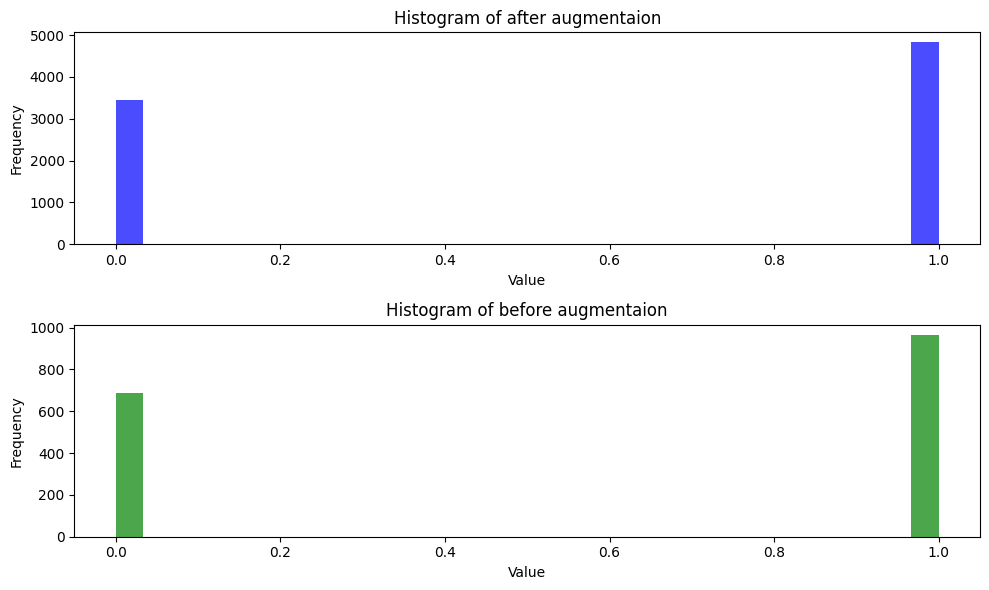

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for demonstration purposes


# Create histograms
plt.figure(figsize=(10, 6))

# Histogram for y
plt.subplot(2, 1, 1)
plt.hist(labels, bins=30, color='blue', alpha=0.7)
plt.title("Histogram of after augmentaion")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Histogram for y2
plt.subplot(2, 1, 2)
plt.hist(labels_with_no_augmentation, bins=30, color='green', alpha=0.7)
plt.title("Histogram of before augmentaion")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


[869, 2894, 2115, 1930, 484]


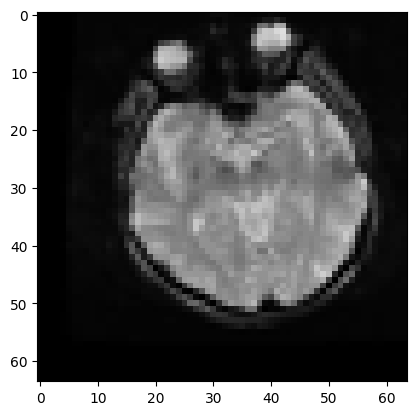

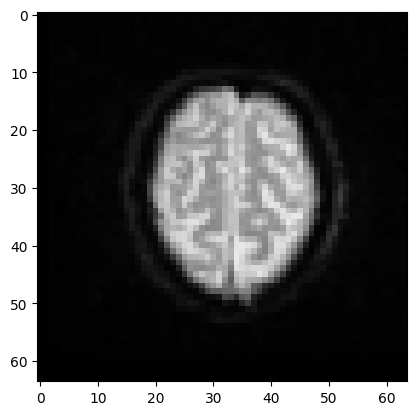

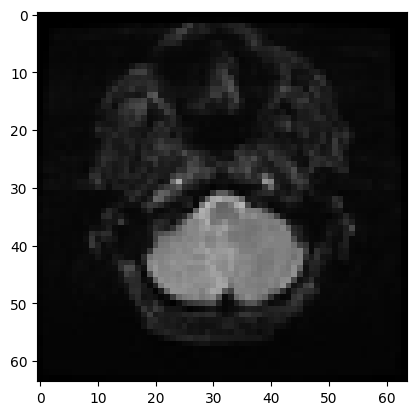

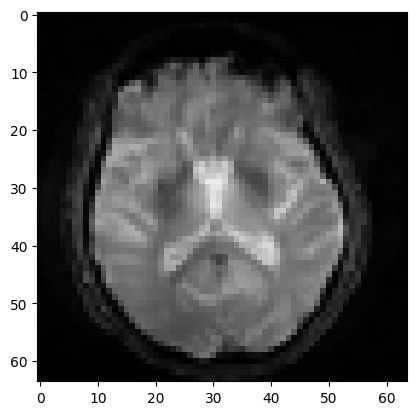

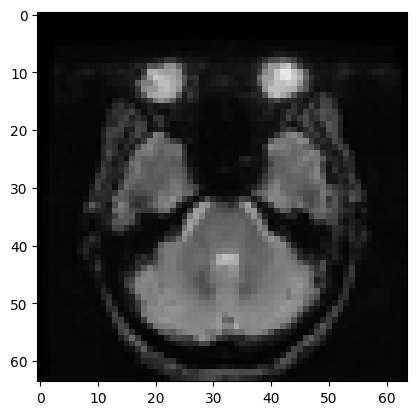

In [18]:
import random
x1 = list(range(8270))

# Choose 5 random elements from the array
random_elements = random.sample(x1, 5)
print(random_elements)
for i in random_elements:
    plt.figure()
    plt.imshow(x[i])
    # Show/save figure as desired.
    plt.show()

# Train and test splits data

In [5]:
x_train , x_test, y_train , y_test = train_test_split(x, labels , test_size =0.05, random_state = 0, shuffle =True)


In [6]:
x_train2 , x_validation , y_train2 , y_validation = train_test_split(x_train, y_train , test_size =0.1, random_state = 0, shuffle=False)

In [7]:
y_train2.shape

(7070,)

# Implement the network

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
import keras


In [26]:
#proposed model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3) ))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))

model.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
#  
model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dense(64))
model.add(Activation('relu'))


model.add(Dense(2))
model.add(Activation('softmax'))


In [27]:
opt = keras.optimizers.Adam(learning_rate=0.1)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())    


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 dropout_10 (Dropout)        (None, 62, 62, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 activation_23 (Activation)  (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 32)        9248      
                                                      

In [28]:
y_onehot_train2 = tf.one_hot(y_train2, 2)
y_onehot_validation = tf.one_hot(y_validation,2)
model_fit_proposed=model.fit(x_train2, 
          y_onehot_train2, 
          batch_size = 18,
          verbose =1,
          epochs = 10,      
          validation_data=(x_validation,y_onehot_validation),
          shuffle= False
                     )


Epoch 1/10
393/393 [==============================] - 45s 114ms/step - loss: 0.6726 - accuracy: 0.5909 - val_loss: 0.6182 - val_accuracy: 0.6845
Epoch 2/10
393/393 [==============================] - 45s 115ms/step - loss: 0.6038 - accuracy: 0.6717 - val_loss: 0.5550 - val_accuracy: 0.7125
Epoch 3/10
393/393 [==============================] - 44s 112ms/step - loss: 0.5606 - accuracy: 0.7018 - val_loss: 0.5123 - val_accuracy: 0.7290
Epoch 4/10
393/393 [==============================] - 44s 113ms/step - loss: 0.5205 - accuracy: 0.7352 - val_loss: 0.4895 - val_accuracy: 0.7328
Epoch 5/10
393/393 [==============================] - 46s 116ms/step - loss: 0.4765 - accuracy: 0.7668 - val_loss: 0.4496 - val_accuracy: 0.7799
Epoch 6/10
393/393 [==============================] - 44s 113ms/step - loss: 0.4339 - accuracy: 0.7980 - val_loss: 0.4834 - val_accuracy: 0.7697
Epoch 7/10
393/393 [==============================] - 46s 116ms/step - loss: 0.3939 - accuracy: 0.8266 - val_loss: 0.4756 - val_ac

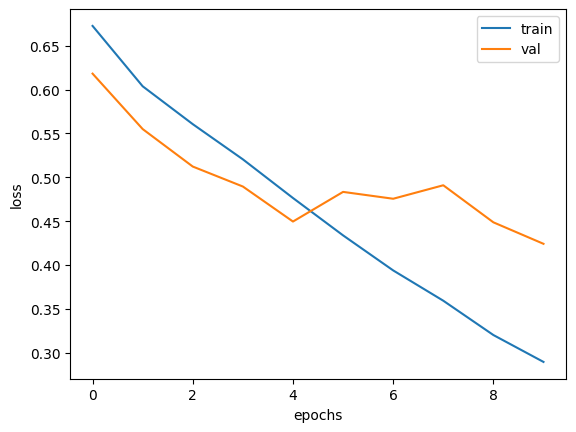

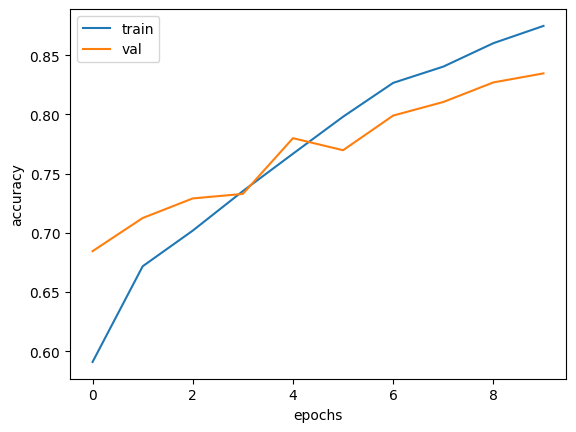

In [29]:
plt.plot(model_fit_proposed.history['loss'], label='train')
plt.plot(model_fit_proposed.history['val_loss'], label='val')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.plot(model_fit_proposed.history['accuracy'], label='train')
plt.plot(model_fit_proposed.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

In [61]:
y_onehot_test= tf.one_hot(y_test, 2)

accuracy_loss =model.evaluate(x_test, y_onehot_test)


13/13 [==============================] - 1s 24ms/step - loss: 0.3178 - accuracy: 0.8671


In [55]:
#testing  model1
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3) ))
model2.add(Dropout(0.2))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model2.add(Activation('relu'))

model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))


model2.add(Dense(2))
model2.add(Activation('softmax'))


In [56]:
opt = keras.optimizers.Adam(learning_rate=0.2)

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model2.summary())    


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 dropout_18 (Dropout)        (None, 62, 62, 32)        0         
                                                                 
 activation_45 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 activation_46 (Activation)  (None, 29, 29, 32)        0         
                                                      

In [57]:
y_onehot_train2 = tf.one_hot(y_train2, 2)
y_onehot_validation = tf.one_hot(y_validation,2)
model_fit=model2.fit(x_train2, 
          y_onehot_train2, 
          batch_size = 18,
          verbose =1,
          epochs = 10,      
          validation_data=(x_validation,y_onehot_validation),
          shuffle= False
                     )


Epoch 1/10
393/393 [==============================] - 28s 70ms/step - loss: 0.5910 - accuracy: 0.6820 - val_loss: 0.5485 - val_accuracy: 0.7341
Epoch 2/10
393/393 [==============================] - 27s 69ms/step - loss: 0.4956 - accuracy: 0.7583 - val_loss: 0.4697 - val_accuracy: 0.7710
Epoch 3/10
393/393 [==============================] - 25s 64ms/step - loss: 0.3952 - accuracy: 0.8228 - val_loss: 0.4106 - val_accuracy: 0.8015
Epoch 4/10
393/393 [==============================] - 26s 66ms/step - loss: 0.2908 - accuracy: 0.8743 - val_loss: 0.3323 - val_accuracy: 0.8601
Epoch 5/10
393/393 [==============================] - 26s 66ms/step - loss: 0.2147 - accuracy: 0.9123 - val_loss: 0.3090 - val_accuracy: 0.8639
Epoch 6/10
393/393 [==============================] - 26s 66ms/step - loss: 0.1594 - accuracy: 0.9403 - val_loss: 0.2976 - val_accuracy: 0.8855
Epoch 7/10
393/393 [==============================] - 24s 61ms/step - loss: 0.1189 - accuracy: 0.9557 - val_loss: 0.3287 - val_accuracy:

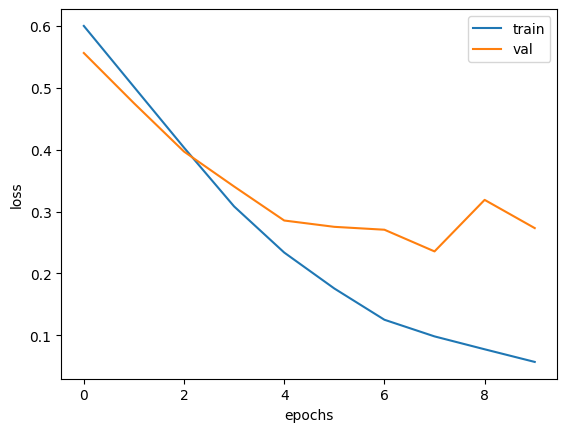

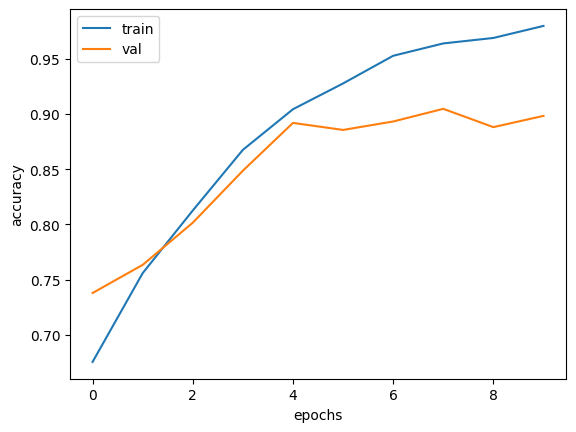

In [65]:
plt.plot(model_fit.history['loss'], label='train')
plt.plot(model_fit.history['val_loss'], label='val')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.plot(model_fit.history['accuracy'], label='train')
plt.plot(model_fit.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

In [66]:
y_onehot_test= tf.one_hot(y_test, 2)

accuracy_loss =model2.evaluate(x_test, y_onehot_test)


13/13 [==============================] - 0s 11ms/step - loss: 0.3158 - accuracy: 0.8816


In [46]:
#testing  model2
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3) ))
model3.add(Dropout(0.2))
model3.add(Activation('relu'))

model3.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())

model3.add(Dense(128))
model3.add(Activation('relu'))

model3.add(Dense(64))
model3.add(Activation('relu'))
model3.add(Dropout(0.2))

model3.add(Dense(2))
model3.add(Activation('softmax'))


In [11]:
opt = keras.optimizers.Adam(learning_rate=0.1)

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model3.summary())    


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                        

In [12]:
y_onehot_train2 = tf.one_hot(y_train2, 2)
y_onehot_validation = tf.one_hot(y_validation,2)
model_fit2=model3.fit(x_train2, 
          y_onehot_train2, 
          batch_size = 18,
          verbose =1,
          epochs = 10,      
          validation_data=(x_validation,y_onehot_validation),
          shuffle= False
                     )


Epoch 1/10
393/393 [==============================] - 35s 83ms/step - loss: 0.5920 - accuracy: 0.6782 - val_loss: 0.5220 - val_accuracy: 0.7417
Epoch 2/10
393/393 [==============================] - 32s 82ms/step - loss: 0.4546 - accuracy: 0.7873 - val_loss: 0.4198 - val_accuracy: 0.8117
Epoch 3/10
393/393 [==============================] - 34s 87ms/step - loss: 0.3318 - accuracy: 0.8502 - val_loss: 0.3511 - val_accuracy: 0.8346
Epoch 4/10
393/393 [==============================] - 33s 84ms/step - loss: 0.2297 - accuracy: 0.8996 - val_loss: 0.3304 - val_accuracy: 0.8588
Epoch 5/10
393/393 [==============================] - 33s 85ms/step - loss: 0.1487 - accuracy: 0.9393 - val_loss: 0.3608 - val_accuracy: 0.8664
Epoch 6/10
393/393 [==============================] - 34s 86ms/step - loss: 0.0951 - accuracy: 0.9634 - val_loss: 0.3448 - val_accuracy: 0.9008
Epoch 7/10
393/393 [==============================] - 34s 87ms/step - loss: 0.0659 - accuracy: 0.9775 - val_loss: 0.3584 - val_accuracy:

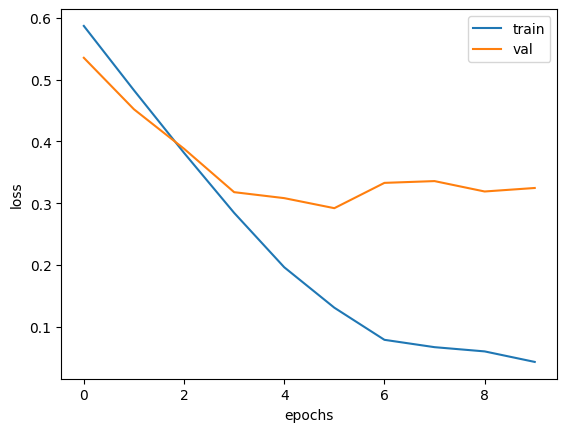

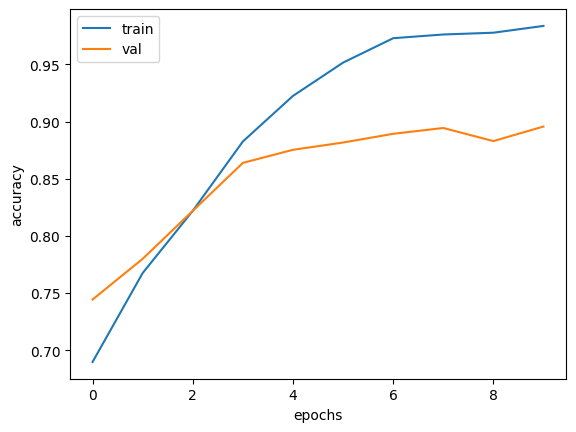

In [53]:
plt.plot(model_fit.history['loss'], label='train')
plt.plot(model_fit.history['val_loss'], label='val')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.plot(model_fit.history['accuracy'], label='train')
plt.plot(model_fit.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

In [55]:
y_onehot_test= tf.one_hot(y_test, 2)

accuracy_loss =model3.evaluate(x_test, y_onehot_test)


13/13 [==============================] - 1s 40ms/step - loss: 0.3559 - accuracy: 0.9034


In [25]:
#testing model 2 with one neuron in output and binary_classification 
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3) ))
model4.add(Dropout(0.2))
model4.add(Activation('relu'))

model4.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())

model4.add(Dense(128))
model4.add(Activation('relu'))

model4.add(Dense(64))
model4.add(Activation('relu'))

model4.add(Dense(1))
model4.add(Activation('sigmoid'))



In [26]:
opt = keras.optimizers.Adam(learning_rate=0.1)

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model4.summary())    

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 60, 60, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,704,993 (14.13 MB)

 Trainable params: 3,704,993 (14.13 MB)

 Non-trainable params: 0 (0.00 B)

None


In [27]:
model_fit3=model4.fit(x_train2, 
          y_train2, 
          batch_size = 18,
          verbose =1,
          epochs = 15,      
          validation_data=(x_validation,y_validation),
          shuffle= False
                     )


Epoch 1/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.6467 - loss: 0.6237 - val_accuracy: 0.7316 - val_loss: 0.5325
Epoch 2/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.7678 - loss: 0.4871 - val_accuracy: 0.7964 - val_loss: 0.4266
Epoch 3/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.8441 - loss: 0.3512 - val_accuracy: 0.8664 - val_loss: 0.3099
Epoch 4/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.9061 - loss: 0.2247 - val_accuracy: 0.8842 - val_loss: 0.3057
Epoch 5/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.9443 - loss: 0.1440 - val_accuracy: 0.9046 - val_loss: 0.2990
Epoch 6/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.9647 - loss: 0.0938 - val_accuracy: 0.9033 - val_loss: 0.3139
Epoch 7/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.9785 - loss: 0.0551 - val_accuracy: 0.8639 - val_loss: 0.4847
Epoch 8/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.9849 - loss: 0.0449 - 

# Plot ROC 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [21]:
y_pred_probs = model3.predict(x_test)
y_pred_probs2=y_pred_probs[0:415 ,1]
y_pred_probs2.shape

13/13 [==============================] - 0s 30ms/step


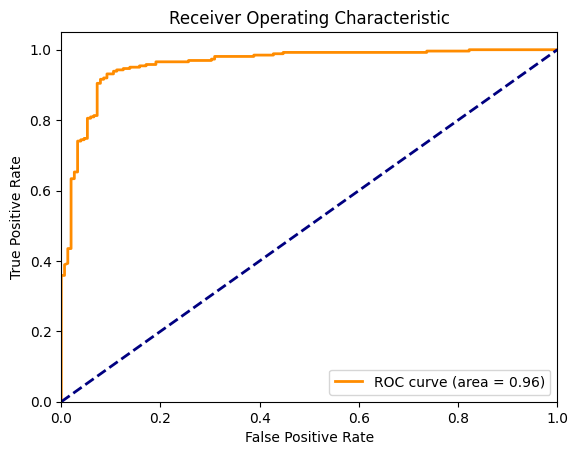

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for test model2 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [23]:
y_pred_probs = model2.predict(x_test)

y_pred_probs_=y_pred_probs[0:415 ,1]
y_pred_probs_.shape

13/13 [==============================] - 1s 50ms/step


(414,)

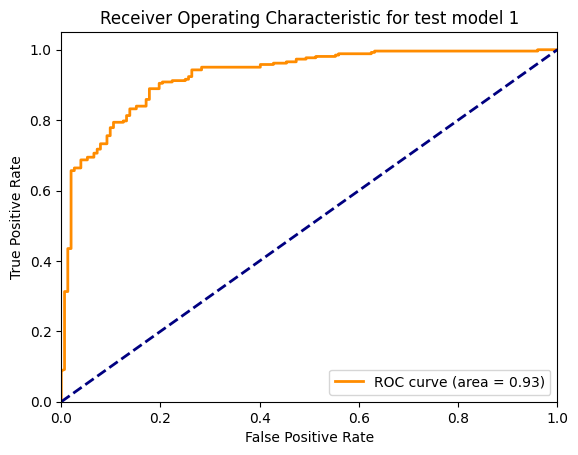

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for test model1 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for test model 1')
plt.legend(loc="lower right")
plt.show()

13/13 [==============================] - 1s 36ms/step


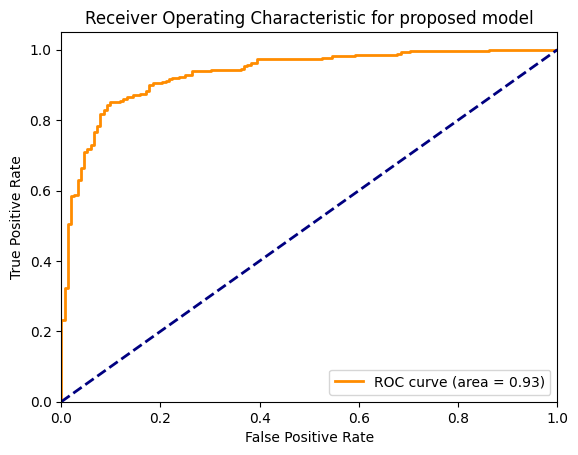

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_probs = model1.predict(x_test)

y_pred_probs=y_pred_probs[0:415 ,1]
y_pred_probs2.shape

# Compute ROC curve for prposed model
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


In [29]:
cutoff =0.7
# Predict the labels for X_test
y_pred = model2.predict(x_test)
y_pred_classes = np.zeros_like(y_pred)    # initialise a matrix full with zeros
y_pred_classes[y_pred > cutoff] = 1       # add a 1 if the cutoff was breached
y_pred_classes1_=y_pred_classes[0:415,1]

13/13 [==============================] - 0s 25ms/step


In [31]:
score  =accuracy_score(y_pred_classes1,  y_test)
print("accuracy is equal to:" , score)

accuracy is equal to: 0.9178743961352657


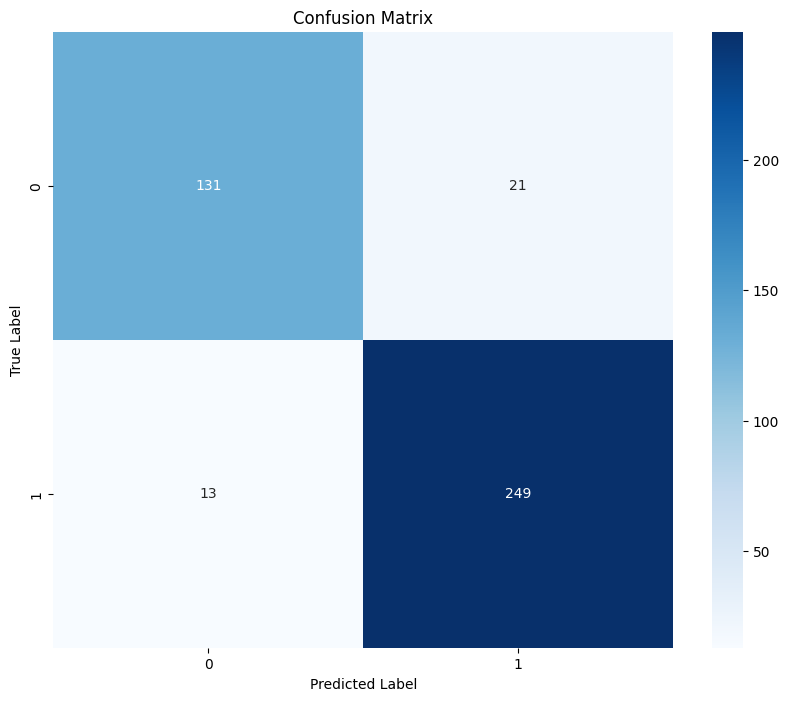

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix for test model 1

cm = confusion_matrix(y_test,y_pred_classes1_)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Adjust fmt if you expect large numbers
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [13]:
cutoff =0.7
# Predict the labels for X_test
y_pred = model3.predict(x_test)
y_pred_classes = np.zeros_like(y_pred)    # initialise a matrix full with zeros
y_pred_classes[y_pred > cutoff] = 1       # add a 1 if the cutoff was breached
y_pred_classes1=y_pred_classes[0:415,1]

13/13 [==============================] - 1s 27ms/step


In [32]:
score  =accuracy_score(y_pred_classes1,  y_test)
print("accuracy is equal to:" , score)

accuracy is equal to: 0.8816425120772947


In [ ]:
# confusion matrix for proposed model 

cutoff =0.7
# Predict the labels for X_test
y_pred2_ = model.predict(x_test)
y_pred_classes_2 = np.zeros_like(y_pred)    # initialise a matrix full with zeros
y_pred_classes_2[y_pred > cutoff] = 1       # add a 1 if the cutoff was breached
y_pred_classes1_2=y_pred_classes[0:415,1]

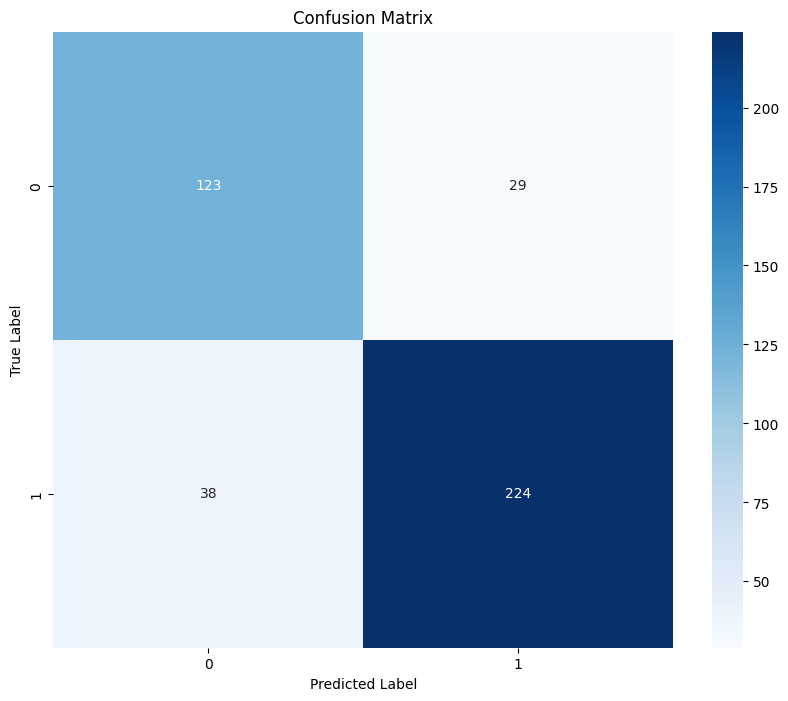

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix for proposed model
cm = confusion_matrix(y_test,y_pred_classes1_2)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Adjust fmt if you expect large numbers
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

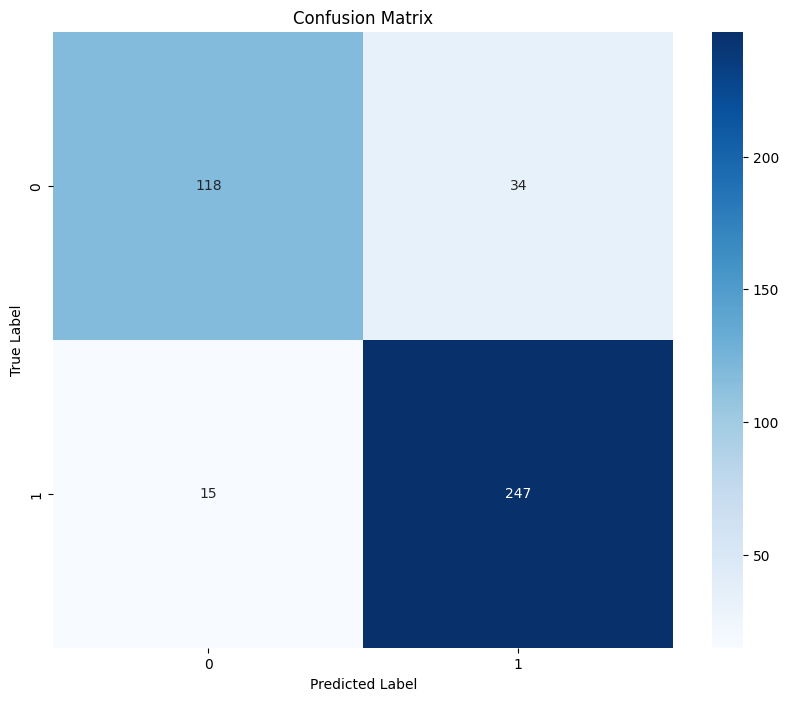

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix for test model2
cm = confusion_matrix(y_test,y_pred_classes1)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Adjust fmt if you expect large numbers
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [16]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming x_train and y_train are your training data

from sklearn.metrics import classification_report

# Generate a classification report for test model2
report = classification_report(y_test, y_pred_classes1,target_names = ['AD','not_AD'])
print(report)

              precision    recall  f1-score   support

          AD       0.89      0.78      0.83       152
      not_AD       0.88      0.94      0.91       262

    accuracy                           0.88       414
   macro avg       0.88      0.86      0.87       414
weighted avg       0.88      0.88      0.88       414



In [57]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming x_train and y_train are your training data

from sklearn.metrics import classification_report

# Generate a classification report for test model1

report = classification_report(y_test, y_pred_classes1_,target_names = ['AD','not_AD'])
print(report)

              precision    recall  f1-score   support

          AD       0.74      0.92      0.82       152
      not_AD       0.95      0.82      0.88       262

    accuracy                           0.86       414
   macro avg       0.85      0.87      0.85       414
weighted avg       0.87      0.86      0.86       414



In [63]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming x_train and y_train are your training data

from sklearn.metrics import classification_report

# Generate a classification report for prposed model 
report = classification_report(y_test, y_pred_classes1_2,target_names = ['AD','not_AD'])
print(report)

              precision    recall  f1-score   support

          AD       0.76      0.81      0.79       152
      not_AD       0.89      0.85      0.87       262

    accuracy                           0.84       414
   macro avg       0.82      0.83      0.83       414
weighted avg       0.84      0.84      0.84       414



# Section 6-1 Compare results

In [35]:
# with 30 % of data for validation
x_train3 , x_test2, y_train3 , y_test2 = train_test_split(x, labels , test_size =0.05, random_state = 0, shuffle =True) 
x_train3_ , x_validation2 , y_train3_ , y_validation2 = train_test_split(x_train3, y_train3 , test_size =0.3, random_state = 0, shuffle=False)

In [36]:
y_train3_.shape

(5499,)

In [37]:
# with 50 % of data for validation

x_train4 , x_test3, y_train4 , y_test3 = train_test_split(x, labels , test_size =0.05, random_state = 0, shuffle =True)
x_train4_ , x_validation3 , y_train4_ , y_validation3 = train_test_split(x_train4, y_train4 , test_size =0.5, random_state = 0, shuffle=False)

In [130]:
y_validation.shape

(786,)

In [122]:
#proposed model
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3) ))
model5.add(Dropout(0.2))

model5.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model5.add(Activation('relu'))

model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model5.add(Dropout(0.2))

model5.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))

model5.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Flatten())
#  
model5.add(Dense(128))
model5.add(Activation('relu'))


model5.add(Dense(64))
model5.add(Activation('relu'))

model5.add(Dense(2))
model5.add(Activation('softmax'))


In [123]:
opt = keras.optimizers.Adam(learning_rate=0.1)

model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model5.summary())    


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_49 (Activation)           │ (None, 60, 60, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 26, 26, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_50 (Activation)           │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 9, 9, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_51 (Activation)           │ (None, 9, 9, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_52 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_53 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_54 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 121,186 (473.38 KB)

 Trainable params: 121,186 (473.38 KB)

 Non-trainable params: 0 (0.00 B)

None


In [124]:
y_onehot_train2 = tf.one_hot(y_train3_, 2)
y_onehot_validation2 = tf.one_hot(y_validation2,2)
model_fit5=model5.fit(x_train3_, 
          y_onehot_train2, 
          batch_size = 18,
          verbose =1,
          epochs = 15,      
          validation_data=(x_validation2,y_onehot_validation2),
          shuffle= False
                     )


Epoch 1/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.5746 - loss: 0.6776 - val_accuracy: 0.6216 - val_loss: 0.6265
Epoch 2/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.6678 - loss: 0.6234 - val_accuracy: 0.6992 - val_loss: 0.5755
Epoch 3/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.7120 - loss: 0.5730 - val_accuracy: 0.6801 - val_loss: 0.6052
Epoch 4/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.7308 - loss: 0.5416 - val_accuracy: 0.7450 - val_loss: 0.5164
Epoch 5/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.7665 - loss: 0.4918 - val_accuracy: 0.7616 - val_loss: 0.4922
Epoch 6/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.7865 - loss: 0.4504 - val_accuracy: 0.7692 - val_loss: 0.4742
Epoch 7/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.8142 - loss: 0.4059 - val_accuracy: 0.7968 - val_loss: 0.4418
Epoch 8/15
306/306 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.8431 - loss: 0.3495 - 

In [191]:
#proposed model
model6 = Sequential()
model6.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3) ))
model6.add(Dropout(0.2))

model6.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model6.add(Activation('relu'))

model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model6.add(Dropout(0.2))

model6.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model6.add(Activation('relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))

model6.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model6.add(Activation('relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Flatten())
#  
model6.add(Dense(128))
model6.add(Activation('relu'))


model6.add(Dense(64))
model6.add(Activation('relu'))

model6.add(Dense(2))
model6.add(Activation('softmax'))



C:\Users\Entezar\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [192]:

opt = keras.optimizers.Adam(learning_rate=0.1)

model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model6.summary())    


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_72 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_80 (Activation)           │ (None, 60, 60, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_74 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_75 (Conv2D)                   │ (None, 26, 26, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_81 (Activation)           │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_76 (Conv2D)                   │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_77 (Conv2D)                   │ (None, 9, 9, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_82 (Activation)           │ (None, 9, 9, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_83 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_84 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_85 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 121,186 (473.38 KB)

 Trainable params: 121,186 (473.38 KB)

 Non-trainable params: 0 (0.00 B)

None


In [193]:
y_onehot_train = tf.one_hot(y_train4_, 2)
y_onehot_validation3 = tf.one_hot(y_validation3,2)
model_fit6=model6.fit(x_train4_, 
          y_onehot_train, 
          batch_size = 18,
          verbose =1,
          epochs = 15,      
          validation_data=(x_validation3,y_onehot_validation3),
          shuffle= False
                     )


Epoch 1/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.5632 - loss: 0.6824 - val_accuracy: 0.6522 - val_loss: 0.6270
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.6512 - loss: 0.6381 - val_accuracy: 0.6795 - val_loss: 0.6151
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.6916 - loss: 0.5975 - val_accuracy: 0.6797 - val_loss: 0.6232
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.6849 - loss: 0.5777 - val_accuracy: 0.6986 - val_loss: 0.5876
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.7190 - loss: 0.5474 - val_accuracy: 0.7172 - val_loss: 0.5442
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7404 - loss: 0.5115 - val_accuracy: 0.7205 - val_loss: 0.5565
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7700 - loss: 0.4827 - val_accuracy: 0.7276 - val_loss: 0.5439
Epoch 8/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.7895 - loss: 0.4502 - val_acc

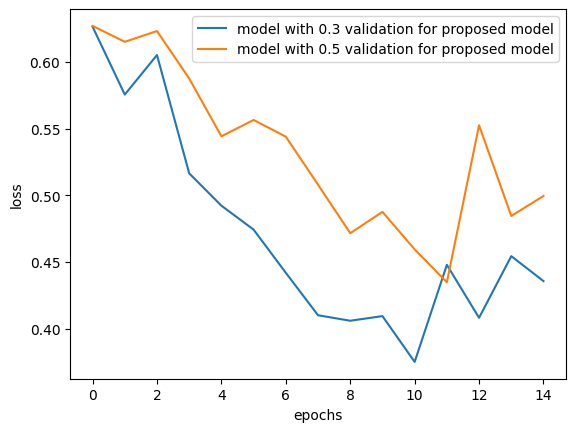

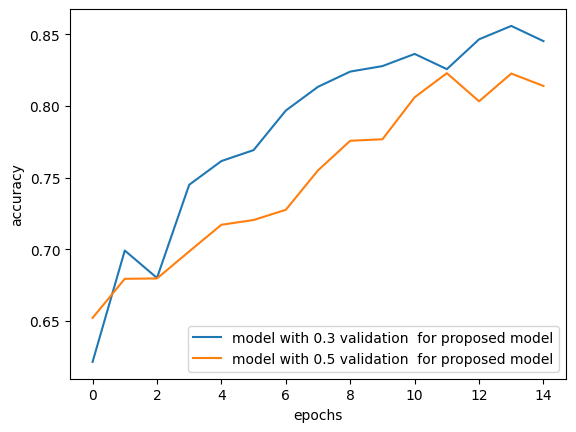

In [199]:
plt.plot(model_fit5.history['val_loss'], label='model with 0.3 validation for proposed model')
plt.plot(model_fit6.history['val_loss'], label='model with 0.5 validation for proposed model')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.plot(model_fit5.history['val_accuracy'], label='model with 0.3 validation  for proposed model')
plt.plot(model_fit6.history['val_accuracy'], label='model with 0.5 validation  for proposed model' )
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

In [132]:

opt = keras.optimizers.Adam(learning_rate=0.1)

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model2.summary())    


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 activation_46 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 activation_47 (Activation)  (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                 

In [156]:
y_onehot_train = tf.one_hot(y_train3_, 2)
y_onehot_validation2 = tf.one_hot(y_validation2,2)
model_fit_testmodel2_with_thirtysize_ofdata=model2.fit(x_train3_, 
          y_onehot_train, 
          batch_size = 18,
          verbose =1,
          epochs = 10,      
          validation_data=(x_validation2,y_onehot_validation2),
          shuffle= False
                     )


Epoch 1/10
306/306 [==============================] - 49s 154ms/step - loss: 0.6025 - accuracy: 0.6743 - val_loss: 0.5510 - val_accuracy: 0.7374
Epoch 2/10
306/306 [==============================] - 47s 154ms/step - loss: 0.5123 - accuracy: 0.7485 - val_loss: 0.4835 - val_accuracy: 0.7751
Epoch 3/10
306/306 [==============================] - 47s 154ms/step - loss: 0.4314 - accuracy: 0.8032 - val_loss: 0.4348 - val_accuracy: 0.7951
Epoch 4/10
306/306 [==============================] - 47s 152ms/step - loss: 0.3579 - accuracy: 0.8369 - val_loss: 0.4003 - val_accuracy: 0.8193
Epoch 5/10
306/306 [==============================] - 47s 152ms/step - loss: 0.2781 - accuracy: 0.8820 - val_loss: 0.3845 - val_accuracy: 0.8362
Epoch 6/10
306/306 [==============================] - 47s 152ms/step - loss: 0.2009 - accuracy: 0.9171 - val_loss: 0.4137 - val_accuracy: 0.8261
Epoch 7/10
306/306 [==============================] - 48s 157ms/step - loss: 0.1462 - accuracy: 0.9434 - val_loss: 0.3988 - val_ac

In [139]:

opt = keras.optimizers.Adam(learning_rate=0.1)

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model2.summary())    


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 activation_46 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 activation_47 (Activation)  (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                 

In [147]:
y_onehot_train2 = tf.one_hot(y_train4_, 2)
y_onehot_validation3 = tf.one_hot(y_validation3,2)
model_fit_testmodel2_with_thiftysize_ofdata=model2.fit(x_train4_, 
          y_onehot_train2, 
          batch_size = 18,
          verbose =1,
          epochs = 10,      
          validation_data=(x_validation3,y_onehot_validation3),
          shuffle= False
                     )


Epoch 1/10
219/219 [==============================] - 40s 172ms/step - loss: 0.6306 - accuracy: 0.6329 - val_loss: 0.5929 - val_accuracy: 0.7019
Epoch 2/10
219/219 [==============================] - 36s 164ms/step - loss: 0.5642 - accuracy: 0.7075 - val_loss: 0.5517 - val_accuracy: 0.7217
Epoch 3/10
219/219 [==============================] - 35s 162ms/step - loss: 0.5009 - accuracy: 0.7569 - val_loss: 0.5075 - val_accuracy: 0.7533
Epoch 4/10
219/219 [==============================] - 36s 163ms/step - loss: 0.4200 - accuracy: 0.8009 - val_loss: 0.4899 - val_accuracy: 0.7762
Epoch 5/10
219/219 [==============================] - 36s 164ms/step - loss: 0.3456 - accuracy: 0.8457 - val_loss: 0.4677 - val_accuracy: 0.7905
Epoch 6/10
219/219 [==============================] - 36s 164ms/step - loss: 0.2803 - accuracy: 0.8844 - val_loss: 0.4520 - val_accuracy: 0.8014
Epoch 7/10
219/219 [==============================] - 36s 166ms/step - loss: 0.2257 - accuracy: 0.9096 - val_loss: 0.4356 - val_ac

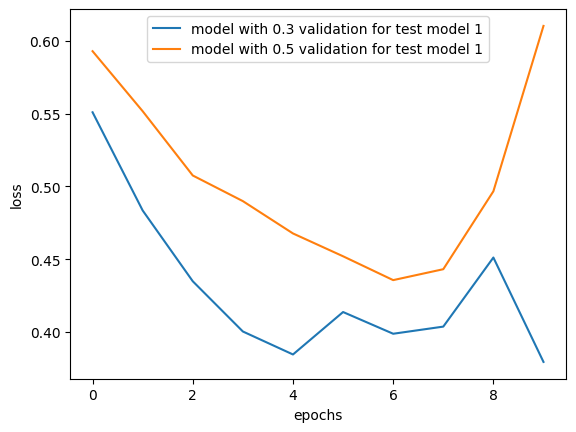

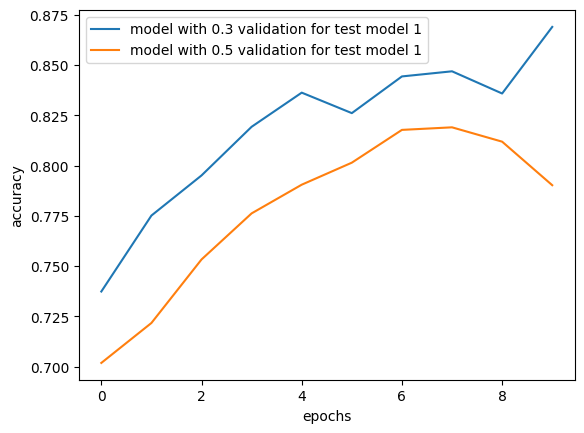

In [157]:
plt.plot(model_fit_testmodel2_with_thirtysize_ofdata.history['val_loss'], label='model with 0.3 validation for test model 1')
plt.plot(model_fit_testmodel2_with_thiftysize_ofdata.history['val_loss'], label='model with 0.5 validation for test model 1')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.plot(model_fit_testmodel2_with_thirtysize_ofdata.history['val_accuracy'], label='model with 0.3 validation for test model 1')
plt.plot(model_fit_testmodel2_with_thiftysize_ofdata.history['val_accuracy'], label='model with 0.5 validation for test model 1' )
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

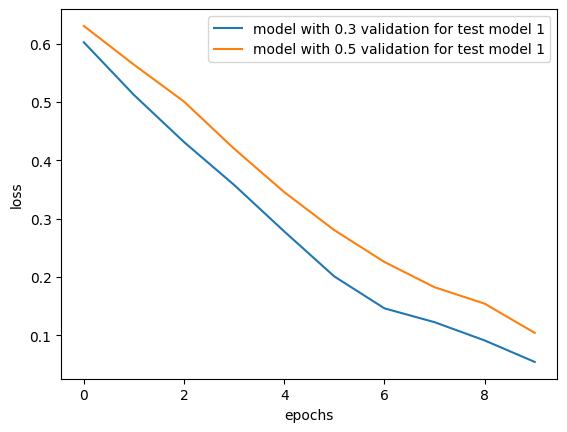

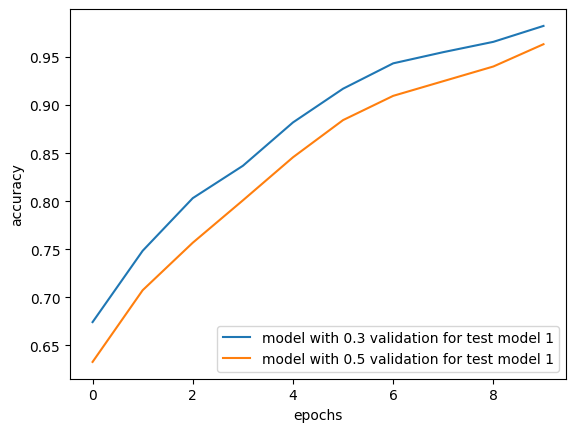

In [158]:
plt.plot(model_fit_testmodel2_with_thirtysize_ofdata.history['loss'], label='model with 0.3 validation for test model 1')
plt.plot(model_fit_testmodel2_with_thiftysize_ofdata.history['loss'], label='model with 0.5 validation for test model 1')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.plot(model_fit_testmodel2_with_thirtysize_ofdata.history['accuracy'], label='model with 0.3 validation for test model 1')
plt.plot(model_fit_testmodel2_with_thiftysize_ofdata.history['accuracy'], label='model with 0.5 validation for test model 1' )
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

In [47]:
opt = keras.optimizers.Adam(learning_rate=0.1)

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model3.summary())    


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 dropout_14 (Dropout)        (None, 62, 62, 32)        0         
                                                                 
 activation_34 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 activation_35 (Activation)  (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                      

In [44]:
#this is with test size with 0.3
y_onehot_train = tf.one_hot(y_train3_, 2)
y_onehot_validation2 = tf.one_hot(y_validation2,2)
y_onehot_train_ = tf.one_hot(y_train3_, 2)
y_onehot_validation2 = tf.one_hot(y_validation2,2)
model_fit_testmodel3_with_thirtysize_ofdata=model3.fit(x_train3_, 
          y_onehot_train_, 
          batch_size = 18,
          verbose =1,
          epochs = 10,      
          validation_data=(x_validation2,y_onehot_validation2),
          shuffle= False
                     )


Epoch 1/10
306/306 [==============================] - 30s 94ms/step - loss: 0.6184 - accuracy: 0.6599 - val_loss: 0.5615 - val_accuracy: 0.7246
Epoch 2/10
306/306 [==============================] - 25s 83ms/step - loss: 0.5190 - accuracy: 0.7421 - val_loss: 0.4784 - val_accuracy: 0.7802
Epoch 3/10
306/306 [==============================] - 25s 83ms/step - loss: 0.4138 - accuracy: 0.8107 - val_loss: 0.4140 - val_accuracy: 0.8125
Epoch 4/10
306/306 [==============================] - 25s 82ms/step - loss: 0.3065 - accuracy: 0.8703 - val_loss: 0.3877 - val_accuracy: 0.8142
Epoch 5/10
306/306 [==============================] - 25s 81ms/step - loss: 0.2211 - accuracy: 0.9067 - val_loss: 0.3862 - val_accuracy: 0.8324
Epoch 6/10
306/306 [==============================] - 25s 82ms/step - loss: 0.1509 - accuracy: 0.9373 - val_loss: 0.4740 - val_accuracy: 0.8362
Epoch 7/10
306/306 [==============================] - 26s 84ms/step - loss: 0.1129 - accuracy: 0.9565 - val_loss: 0.5726 - val_accuracy:

In [48]:
#this is with test size with 0.5 , in this section we must first compile network and  run this cell
y_onehot_train3 = tf.one_hot(y_train4_, 2)
y_onehot_validation3 = tf.one_hot(y_validation3,2)
model_fit_testmodel3_with_thiftysize_ofdata=model3.fit(x_train4_, 
          y_onehot_train3, 
          batch_size = 18,
          verbose =1,
          epochs = 10,      
          validation_data=(x_validation3,y_onehot_validation3),
          shuffle= False
                     )


Epoch 1/10
219/219 [==============================] - 21s 90ms/step - loss: 0.6187 - accuracy: 0.6403 - val_loss: 0.5704 - val_accuracy: 0.7062
Epoch 2/10
219/219 [==============================] - 19s 88ms/step - loss: 0.5190 - accuracy: 0.7413 - val_loss: 0.5025 - val_accuracy: 0.7574
Epoch 3/10
219/219 [==============================] - 19s 88ms/step - loss: 0.4247 - accuracy: 0.7991 - val_loss: 0.4606 - val_accuracy: 0.7864
Epoch 4/10
219/219 [==============================] - 19s 88ms/step - loss: 0.3395 - accuracy: 0.8495 - val_loss: 0.5766 - val_accuracy: 0.7462
Epoch 5/10
219/219 [==============================] - 19s 87ms/step - loss: 0.2676 - accuracy: 0.8844 - val_loss: 0.4842 - val_accuracy: 0.7968
Epoch 6/10
219/219 [==============================] - 20s 90ms/step - loss: 0.1914 - accuracy: 0.9229 - val_loss: 0.5091 - val_accuracy: 0.8096
Epoch 7/10
219/219 [==============================] - 19s 88ms/step - loss: 0.1512 - accuracy: 0.9379 - val_loss: 0.4722 - val_accuracy:

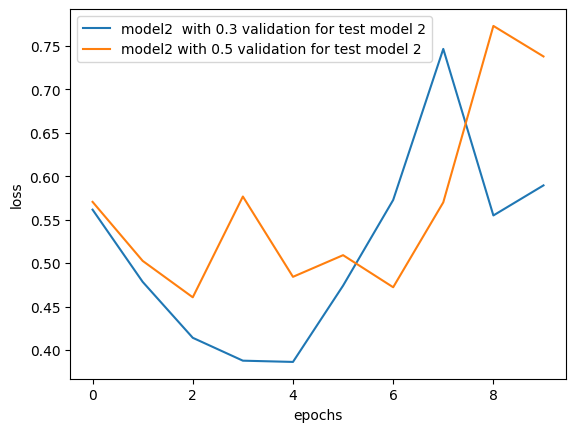

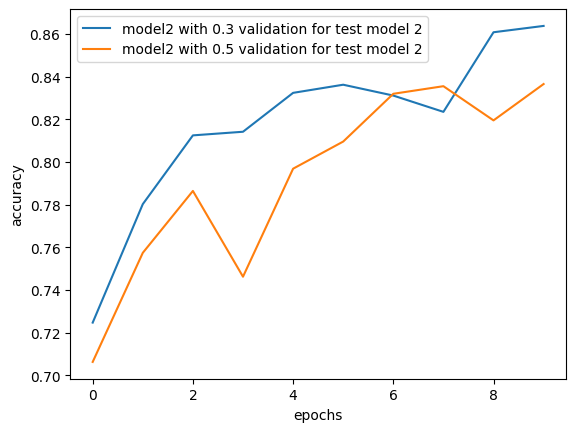

In [49]:
plt.plot(model_fit_testmodel3_with_thirtysize_ofdata.history['val_loss'], label='model2  with 0.3 validation for test model 2')
plt.plot(model_fit_testmodel3_with_thiftysize_ofdata.history['val_loss'], label='model2 with 0.5 validation for test model 2')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.plot(model_fit_testmodel3_with_thirtysize_ofdata.history['val_accuracy'], label='model2 with 0.3 validation for test model 2')
plt.plot(model_fit_testmodel3_with_thiftysize_ofdata.history['val_accuracy'], label='model2 with 0.5 validation for test model 2' )
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

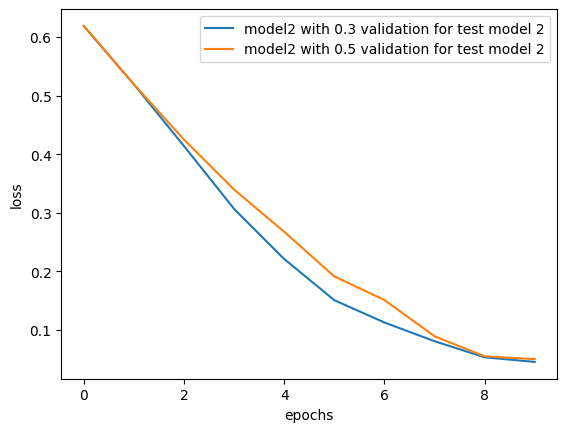

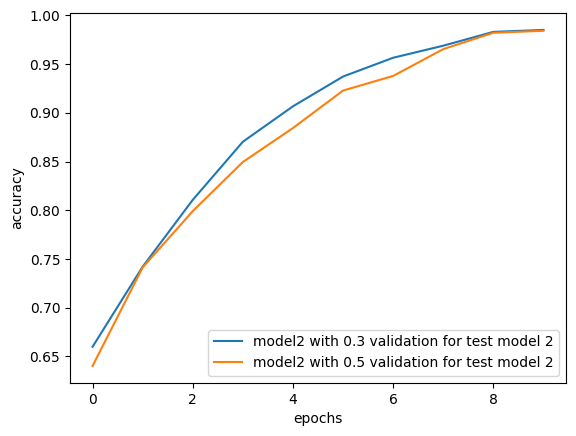

In [50]:
plt.plot(model_fit_testmodel3_with_thirtysize_ofdata.history['loss'], label='model2 with 0.3 validation for test model 2')
plt.plot(model_fit_testmodel3_with_thiftysize_ofdata.history['loss'], label='model2 with 0.5 validation for test model 2')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.plot(model_fit_testmodel3_with_thirtysize_ofdata.history['accuracy'], label='model2 with 0.3 validation for test model 2')
plt.plot(model_fit_testmodel3_with_thiftysize_ofdata.history['accuracy'], label='model2 with 0.5 validation for test model 2' )
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

# effect of dropout at network

In [67]:
#proposed model with out dropout
model7 = Sequential()
model7.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3) ))

model7.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model7.add(Activation('relu'))

model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))

model7.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model7.add(Activation('relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))

model7.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model7.add(Activation('relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Flatten())
#  
model7.add(Dense(128))
model7.add(Activation('relu'))


model7.add(Dense(64))
model7.add(Activation('relu'))

model7.add(Dense(2))
model7.add(Activation('softmax'))


In [68]:
opt = keras.optimizers.Adam(learning_rate=0.1)

model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model7.summary())    


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 conv2d_34 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 activation_50 (Activation)  (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 conv2d_36 (Conv2D)          (None, 26, 26, 32)        9248      
                                                     

In [69]:
y_onehot_train2 = tf.one_hot(y_train2, 2)
y_onehot_validation = tf.one_hot(y_validation,2)
model_fit_proposed_withnodropout=model7.fit(x_train2, 
          y_onehot_train2, 
          batch_size = 18,
          verbose =1,
          epochs = 10,      
          validation_data=(x_validation,y_onehot_validation),
          shuffle= False
                     )


Epoch 1/10
393/393 [==============================] - 27s 69ms/step - loss: 0.6383 - accuracy: 0.6366 - val_loss: 0.5841 - val_accuracy: 0.7036
Epoch 2/10
393/393 [==============================] - 29s 74ms/step - loss: 0.5630 - accuracy: 0.7134 - val_loss: 0.5532 - val_accuracy: 0.7443
Epoch 3/10
393/393 [==============================] - 30s 76ms/step - loss: 0.5141 - accuracy: 0.7513 - val_loss: 0.4888 - val_accuracy: 0.7545
Epoch 4/10
393/393 [==============================] - 29s 74ms/step - loss: 0.4526 - accuracy: 0.7830 - val_loss: 0.4486 - val_accuracy: 0.7875
Epoch 5/10
393/393 [==============================] - 29s 73ms/step - loss: 0.3897 - accuracy: 0.8163 - val_loss: 0.4583 - val_accuracy: 0.7990
Epoch 6/10
393/393 [==============================] - 28s 71ms/step - loss: 0.3292 - accuracy: 0.8492 - val_loss: 0.3872 - val_accuracy: 0.8232
Epoch 7/10
393/393 [==============================] - 28s 71ms/step - loss: 0.2848 - accuracy: 0.8731 - val_loss: 0.3535 - val_accuracy:

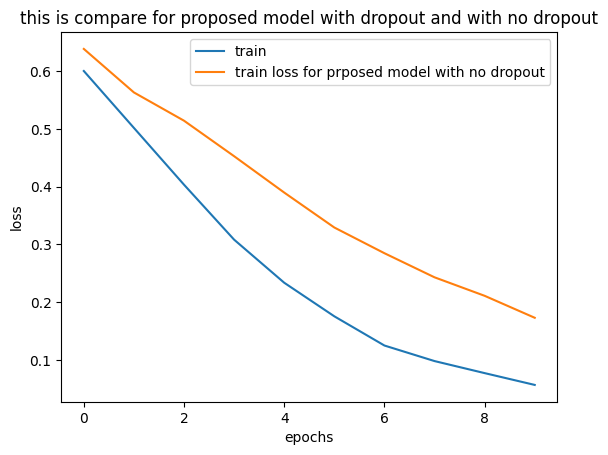

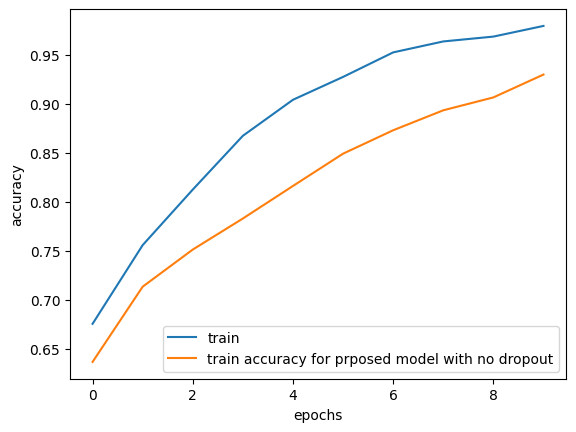

In [70]:
plt.plot(model_fit.history['loss'], label='train')
plt.plot(model_fit_proposed_withnodropout.history['loss'], label='train loss for prposed model with no dropout')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title("this is compare for proposed model with dropout and with no dropout")
plt.legend()
plt.show()

plt.plot(model_fit.history['accuracy'], label='train')
plt.plot(model_fit_proposed_withnodropout.history['accuracy'], label='train accuracy for prposed model with no dropout')
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

In [74]:
#testing  model1 with no dropout
model8 = Sequential()
model8.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3) ))
model8.add(Activation('relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model8.add(Activation('relu'))

model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Flatten())

model8.add(Dense(128))
model8.add(Activation('relu'))


model8.add(Dense(2))
model8.add(Activation('softmax'))


In [75]:
opt = keras.optimizers.Adam(learning_rate=0.2)

model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model8.summary())    


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 activation_60 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 activation_61 (Activation)  (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                

In [76]:
y_onehot_train2 = tf.one_hot(y_train2, 2)
y_onehot_validation = tf.one_hot(y_validation,2)
model_fit_testmodel_withnodropout=model8.fit(x_train2, 
          y_onehot_train2, 
          batch_size = 18,
          verbose =1,
          epochs = 10,      
          validation_data=(x_validation,y_onehot_validation),
          shuffle= False
                     )


Epoch 1/10
393/393 [==============================] - 13s 32ms/step - loss: 0.5878 - accuracy: 0.6880 - val_loss: 0.5536 - val_accuracy: 0.7366
Epoch 2/10
393/393 [==============================] - 12s 32ms/step - loss: 0.4744 - accuracy: 0.7760 - val_loss: 0.4699 - val_accuracy: 0.7824
Epoch 3/10
393/393 [==============================] - 13s 33ms/step - loss: 0.3568 - accuracy: 0.8427 - val_loss: 0.3880 - val_accuracy: 0.8219
Epoch 4/10
393/393 [==============================] - 12s 32ms/step - loss: 0.2498 - accuracy: 0.8960 - val_loss: 0.3367 - val_accuracy: 0.8575
Epoch 5/10
393/393 [==============================] - 12s 31ms/step - loss: 0.1659 - accuracy: 0.9351 - val_loss: 0.3649 - val_accuracy: 0.8588
Epoch 6/10
393/393 [==============================] - 12s 31ms/step - loss: 0.1250 - accuracy: 0.9518 - val_loss: 0.5785 - val_accuracy: 0.8003
Epoch 7/10
393/393 [==============================] - 12s 30ms/step - loss: 0.0926 - accuracy: 0.9629 - val_loss: 0.3917 - val_accuracy:

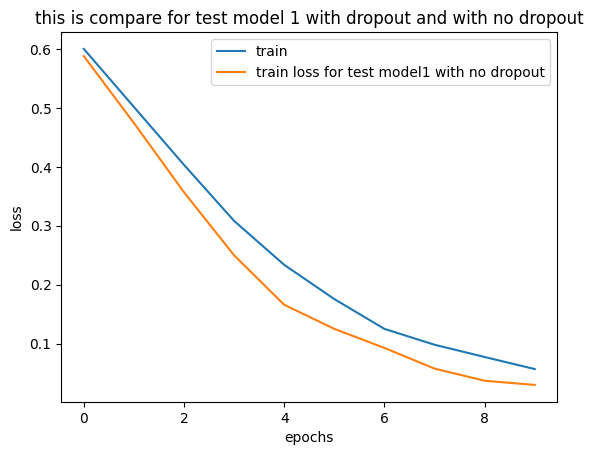

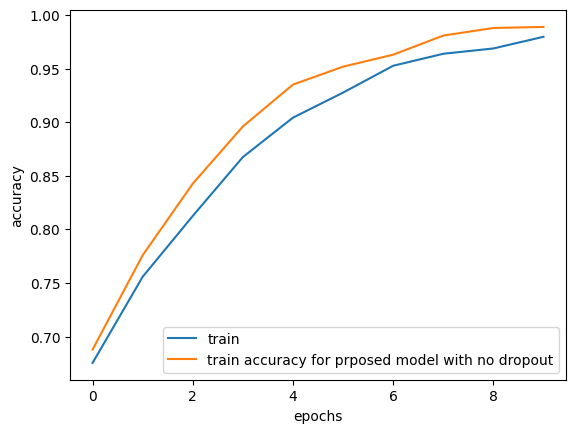

In [77]:
plt.plot(model_fit.history['loss'], label='train')
plt.plot(model_fit_testmodel_withnodropout.history['loss'], label='train loss for test model1 with no dropout')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title("this is compare for test model 1 with dropout and with no dropout")
plt.legend()
plt.show()

plt.plot(model_fit.history['accuracy'], label='train')
plt.plot(model_fit_testmodel_withnodropout.history['accuracy'], label='train accuracy for prposed model with no dropout')
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

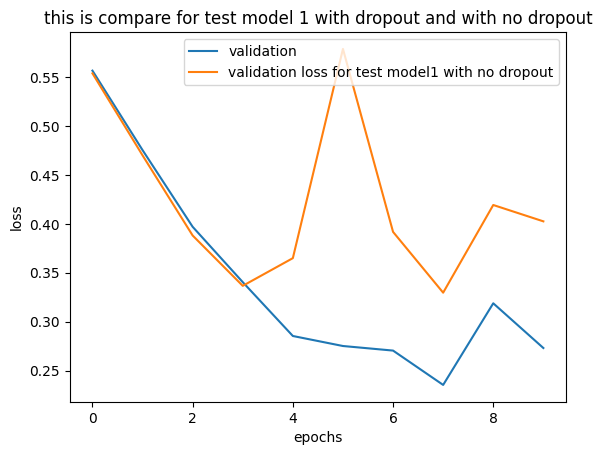

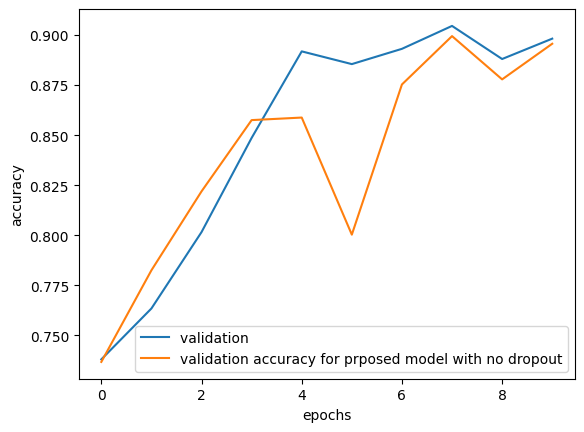

In [79]:
plt.plot(model_fit.history['val_loss'], label='validation')
plt.plot(model_fit_testmodel_withnodropout.history['val_loss'], label='validation loss for test model1 with no dropout')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title("this is compare for test model 1 with dropout and with no dropout")
plt.legend()
plt.show()

plt.plot(model_fit.history['val_accuracy'], label='validation ')
plt.plot(model_fit_testmodel_withnodropout.history['val_accuracy'], label='validation accuracy for prposed model with no dropout')
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

In [80]:
#testing  model2 with out dropout
model9 = Sequential()
model9.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3) ))
model9.add(Activation('relu'))

model9.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model9.add(Activation('relu'))
model9.add(MaxPooling2D(pool_size=(2, 2)))

model9.add(Flatten())

model9.add(Dense(128))
model9.add(Activation('relu'))

model9.add(Dense(64))
model9.add(Activation('relu'))

model9.add(Dense(2))
model9.add(Activation('softmax'))


In [81]:
opt = keras.optimizers.Adam(learning_rate=0.1)

model9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model9.summary())    


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 activation_69 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 conv2d_46 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 activation_70 (Activation)  (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 28800)             0         
                                                     

In [82]:
y_onehot_train2 = tf.one_hot(y_train2, 2)
y_onehot_validation = tf.one_hot(y_validation,2)
model_fit_testmodel3_withnodropout=model9.fit(x_train2, 
          y_onehot_train2, 
          batch_size = 18,
          verbose =1,
          epochs = 10,      
          validation_data=(x_validation,y_onehot_validation),
          shuffle= False
                     )


Epoch 1/10
393/393 [==============================] - 30s 74ms/step - loss: 0.5810 - accuracy: 0.6936 - val_loss: 0.5668 - val_accuracy: 0.7201
Epoch 2/10
393/393 [==============================] - 28s 72ms/step - loss: 0.4403 - accuracy: 0.7963 - val_loss: 0.4404 - val_accuracy: 0.8079
Epoch 3/10
393/393 [==============================] - 29s 73ms/step - loss: 0.3115 - accuracy: 0.8625 - val_loss: 0.3623 - val_accuracy: 0.8524
Epoch 4/10
393/393 [==============================] - 29s 73ms/step - loss: 0.1949 - accuracy: 0.9136 - val_loss: 0.3843 - val_accuracy: 0.8537
Epoch 5/10
393/393 [==============================] - 29s 73ms/step - loss: 0.1283 - accuracy: 0.9495 - val_loss: 0.4743 - val_accuracy: 0.8702
Epoch 6/10
393/393 [==============================] - 28s 72ms/step - loss: 0.0732 - accuracy: 0.9736 - val_loss: 0.5439 - val_accuracy: 0.8626
Epoch 7/10
393/393 [==============================] - 29s 73ms/step - loss: 0.0643 - accuracy: 0.9752 - val_loss: 0.4035 - val_accuracy:

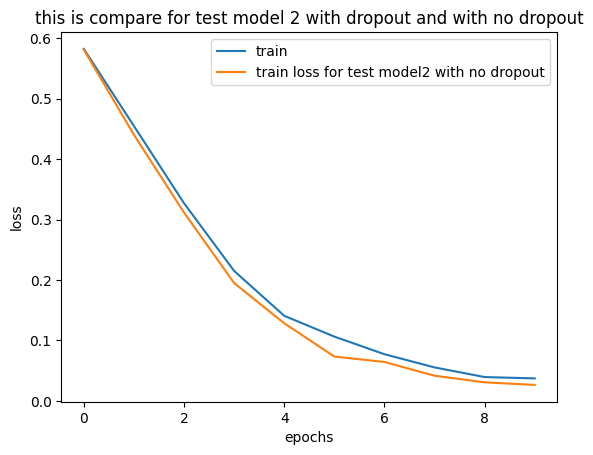

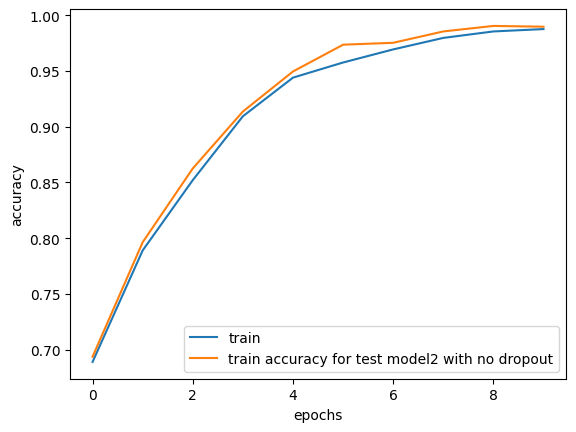

In [83]:
plt.plot(model_fit2.history['loss'], label='train')
plt.plot(model_fit_testmodel3_withnodropout.history['loss'], label='train loss for test model2 with no dropout')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title("this is compare for test model 2 with dropout and with no dropout")
plt.legend()
plt.show()

plt.plot(model_fit2.history['accuracy'], label='train')
plt.plot(model_fit_testmodel3_withnodropout.history['accuracy'], label='train accuracy for test model2 with no dropout')
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

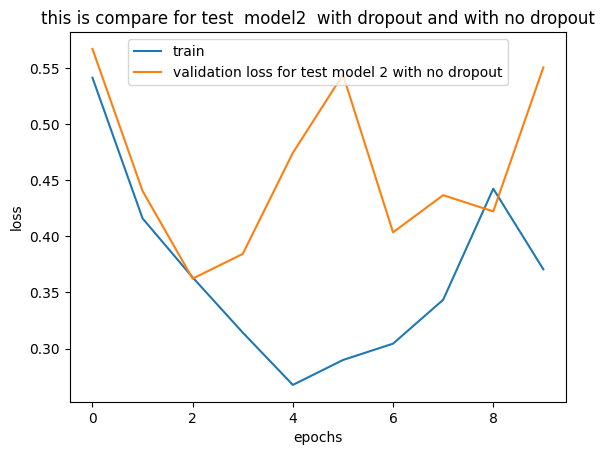

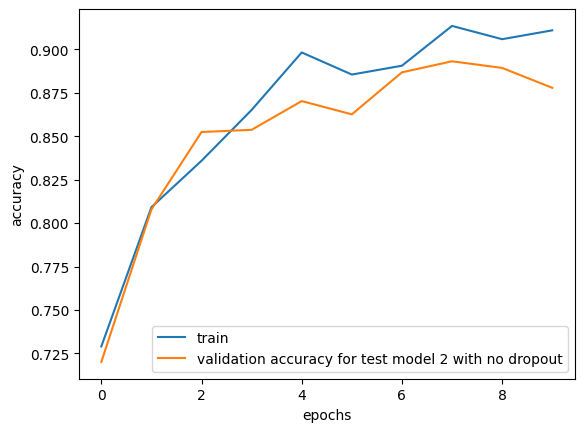

In [84]:
plt.plot(model_fit2.history['val_loss'], label='train')
plt.plot(model_fit_testmodel3_withnodropout.history['val_loss'], label='validation loss for test model 2 with no dropout')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title("this is compare for test  model2  with dropout and with no dropout")
plt.legend()
plt.show()

plt.plot(model_fit2.history['val_accuracy'], label='train')
plt.plot(model_fit_testmodel3_withnodropout.history['val_accuracy'], label='validation accuracy for test model 2 with no dropout')
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

# effect of glorot initializer

In [51]:
# proposed model with out glorot initializer
from keras import  initializers

model10 = Sequential()
model10.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3) ))
model10.add(Dropout(0.2))

model10.add(Conv2D(32, (3, 3), kernel_initializer=initializers.Ones()))
model10.add(Activation('relu'))

model10.add(MaxPooling2D(pool_size=(2, 2)))

model10.add(Conv2D(32, (3, 3), kernel_initializer=initializers.Ones()))
model10.add(Dropout(0.2))

model10.add(Conv2D(32, (3, 3),kernel_initializer=initializers.Ones()))
model10.add(Activation('relu'))
model10.add(MaxPooling2D(pool_size=(2, 2)))

model10.add(Conv2D(32, (3, 3), kernel_initializer=initializers.Ones()))

model10.add(Conv2D(32, (3, 3),kernel_initializer=initializers.zeros()))
model10.add(Activation('relu'))
model10.add(MaxPooling2D(pool_size=(2, 2)))

model10.add(Flatten())
#  
model10.add(Dense(128))
model10.add(Activation('relu'))


model10.add(Dense(64))
model10.add(Activation('relu'))

model10.add(Dense(2))
model10.add(Activation('softmax'))



In [52]:
opt = keras.optimizers.Adam(learning_rate=0.001)

model10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model10.summary())    


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 dropout_16 (Dropout)        (None, 62, 62, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 activation_39 (Activation)  (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 28, 28, 32)        9248      
                                                      

In [53]:
y_onehot_train2 = tf.one_hot(y_train2, 2)
y_onehot_validation = tf.one_hot(y_validation,2)
model_fit_proposed_with_glorotnormal=model10.fit(x_train2, 
          y_onehot_train2, 
          batch_size = 18,
          verbose =1,
          epochs = 10,      
          validation_data=(x_validation,y_onehot_validation),
          shuffle= False
                     )


Epoch 1/10
393/393 [==============================] - 63s 116ms/step - loss: 0.6837 - accuracy: 0.5822 - val_loss: 0.6844 - val_accuracy: 0.5662
Epoch 2/10
393/393 [==============================] - 45s 114ms/step - loss: 0.6797 - accuracy: 0.5825 - val_loss: 0.6847 - val_accuracy: 0.5662
Epoch 3/10
393/393 [==============================] - 45s 115ms/step - loss: 0.6796 - accuracy: 0.5825 - val_loss: 0.6849 - val_accuracy: 0.5662
Epoch 4/10
393/393 [==============================] - 45s 115ms/step - loss: 0.6796 - accuracy: 0.5825 - val_loss: 0.6849 - val_accuracy: 0.5662
Epoch 5/10
393/393 [==============================] - 44s 113ms/step - loss: 0.6796 - accuracy: 0.5825 - val_loss: 0.6849 - val_accuracy: 0.5662
Epoch 6/10
393/393 [==============================] - 45s 115ms/step - loss: 0.6796 - accuracy: 0.5825 - val_loss: 0.6849 - val_accuracy: 0.5662
Epoch 7/10
393/393 [==============================] - 43s 110ms/step - loss: 0.6796 - accuracy: 0.5825 - val_loss: 0.6849 - val_ac

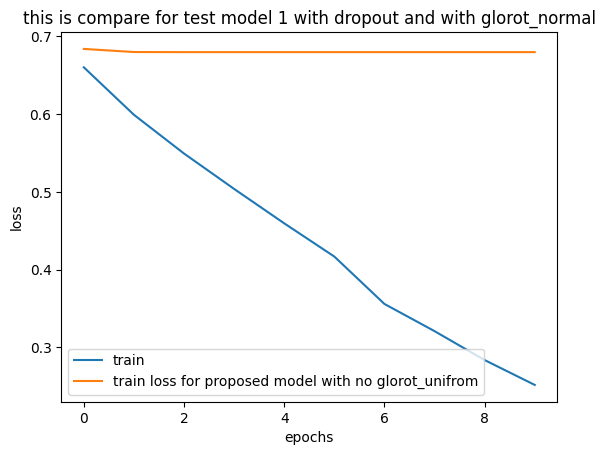

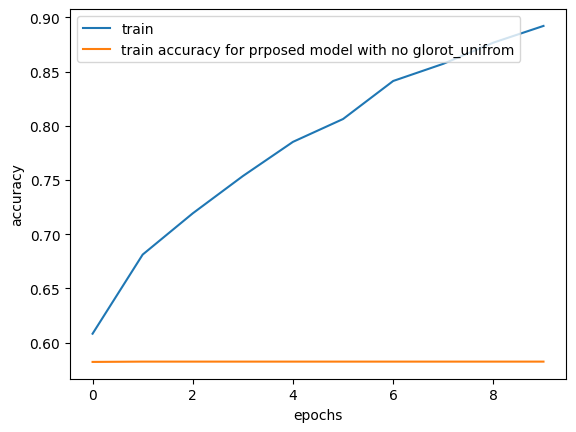

In [110]:
plt.plot(model_fit_proposed.history['loss'], label='train')
plt.plot(model_fit_proposed_with_glorotnormal.history['loss'], label='train loss for proposed model with no glorot_unifrom')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title("this is compare for proposed model 1 with dropout and with glorot_normal")
plt.legend()
plt.show()

plt.plot(model_fit_proposed.history['accuracy'], label='train')
plt.plot(model_fit_proposed_with_glorotnormal.history['accuracy'], label='train accuracy for prposed model with no glorot_unifrom')
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

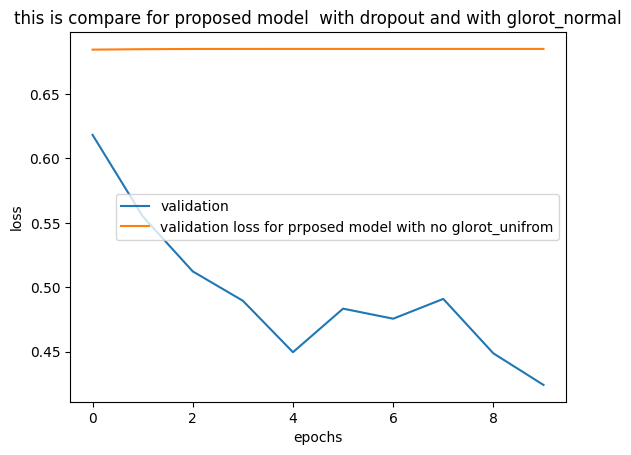

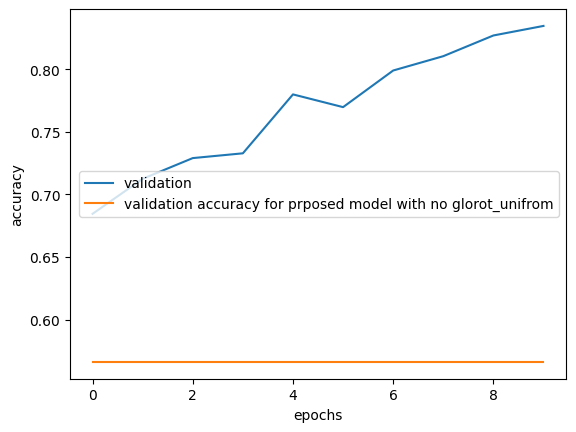

In [58]:
plt.plot(model_fit_proposed.history['val_loss'], label='validation')
plt.plot(model_fit_proposed_with_glorotnormal.history['val_loss'], label='validation loss for prposed model with no glorot_unifrom')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title("this is compare for proposed model  with dropout and with glorot_normal")
plt.legend()
plt.show()

plt.plot(model_fit_proposed.history['val_accuracy'], label='validation')
plt.plot(model_fit_proposed_with_glorotnormal.history['val_accuracy'], label='validation accuracy for prposed model with no glorot_unifrom')
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

In [60]:
#testing  model1
model11= Sequential()
model11.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3) ))
model11.add(Dropout(0.2))
model11.add(Activation('relu'))
model11.add(MaxPooling2D(pool_size=(2, 2)))

model11.add(Conv2D(32, (3, 3), kernel_initializer=initializers.Ones()))
model11.add(Activation('relu'))

model11.add(MaxPooling2D(pool_size=(2, 2)))

model11.add(Flatten())

model11.add(Dense(128))
model11.add(Activation('relu'))


model11.add(Dense(2))
model11.add(Activation('softmax'))


In [61]:
opt = keras.optimizers.Adam(learning_rate=0.1)

model11.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model11.summary())    


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 dropout_20 (Dropout)        (None, 62, 62, 32)        0         
                                                                 
 activation_49 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 activation_50 (Activation)  (None, 29, 29, 32)        0         
                                                      

In [62]:
y_onehot_train2 = tf.one_hot(y_train2, 2)
y_onehot_validation = tf.one_hot(y_validation,2)
model_fit_testmodel1_with_glorotnormal=model11.fit(x_train2, 
          y_onehot_train2, 
          batch_size = 18,
          verbose =1,
          epochs = 10,      
          validation_data=(x_validation,y_onehot_validation),
          shuffle= False
                     )


Epoch 1/10
393/393 [==============================] - 20s 51ms/step - loss: 1.9915 - accuracy: 0.6038 - val_loss: 0.6461 - val_accuracy: 0.6107
Epoch 2/10
393/393 [==============================] - 20s 50ms/step - loss: 0.6419 - accuracy: 0.6378 - val_loss: 0.6301 - val_accuracy: 0.6285
Epoch 3/10
393/393 [==============================] - 23s 57ms/step - loss: 0.6229 - accuracy: 0.6576 - val_loss: 0.6207 - val_accuracy: 0.6374
Epoch 4/10
393/393 [==============================] - 22s 55ms/step - loss: 0.6059 - accuracy: 0.6665 - val_loss: 0.5981 - val_accuracy: 0.6628
Epoch 5/10
393/393 [==============================] - 23s 59ms/step - loss: 0.5908 - accuracy: 0.6864 - val_loss: 0.5823 - val_accuracy: 0.6743
Epoch 6/10
393/393 [==============================] - 21s 52ms/step - loss: 0.5749 - accuracy: 0.6943 - val_loss: 0.5654 - val_accuracy: 0.6947
Epoch 7/10
393/393 [==============================] - 21s 52ms/step - loss: 0.5622 - accuracy: 0.7086 - val_loss: 0.5542 - val_accuracy:

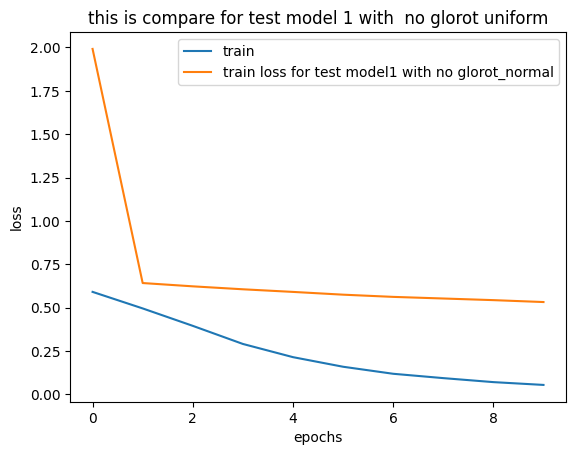

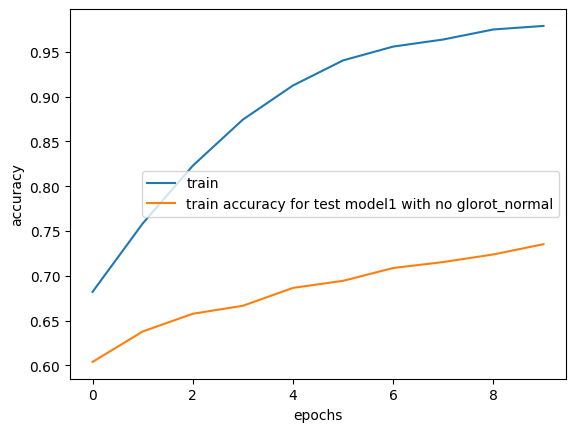

In [63]:
plt.plot(model_fit.history['loss'], label='train')
plt.plot(model_fit_testmodel1_with_glorotnormal.history['loss'], label='train loss for test model1 with no glorot_normal')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title("this is compare for test model 1 with  no glorot uniform")
plt.legend()
plt.show()

plt.plot(model_fit.history['accuracy'], label='train')
plt.plot(model_fit_testmodel1_with_glorotnormal.history['accuracy'], label='train accuracy for test model1 with no glorot_normal')
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

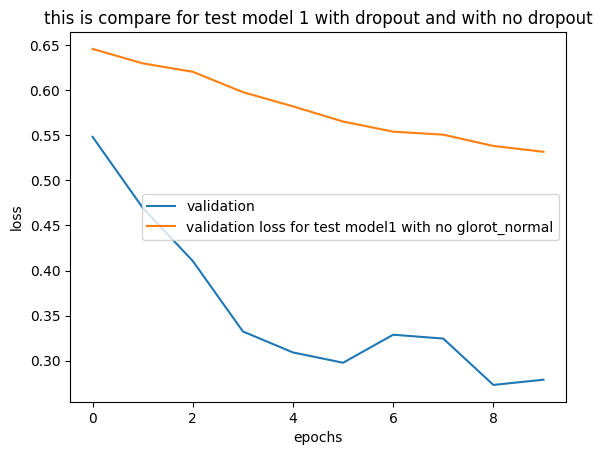

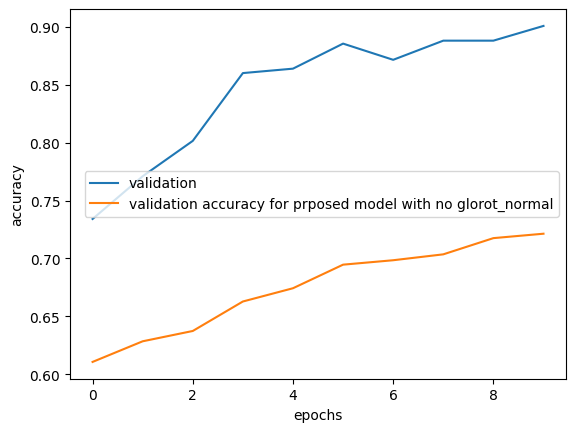

In [64]:
plt.plot(model_fit.history['val_loss'], label='validation')
plt.plot(model_fit_testmodel1_with_glorotnormal.history['val_loss'], label='validation loss for test model1 with no glorot_normal')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title("this is compare for test model 1 with dropout and with no dropout")
plt.legend()
plt.show()

plt.plot(model_fit.history['val_accuracy'], label='validation')
plt.plot(model_fit_testmodel1_with_glorotnormal.history['val_accuracy'], label='validation accuracy for prposed model with no glorot_normal')
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

In [65]:
#testing  model2
model12 = Sequential()
model12.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3) ))
model12.add(Dropout(0.2))
model12.add(Activation('relu'))

model12.add(Conv2D(32, (3, 3),kernel_initializer=initializers.Ones()))
model12.add(Activation('relu'))
model12.add(MaxPooling2D(pool_size=(2, 2)))

model12.add(Flatten())

model12.add(Dense(128))
model12.add(Activation('relu'))

model12.add(Dense(64))
model12.add(Activation('relu'))

model12.add(Dense(2))
model12.add(Activation('softmax'))


In [66]:
opt = keras.optimizers.Adam(learning_rate=0.1)

model12.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model12.summary())    


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 dropout_21 (Dropout)        (None, 62, 62, 32)        0         
                                                                 
 activation_53 (Activation)  (None, 62, 62, 32)        0         
                                                                 
 conv2d_41 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 activation_54 (Activation)  (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                     

In [67]:
y_onehot_train2 = tf.one_hot(y_train2, 2)
y_onehot_validation = tf.one_hot(y_validation,2)
model_fit_testmodel2_with_glorotnormal=model12.fit(x_train2, 
          y_onehot_train2, 
          batch_size = 18,
          verbose =1,
          epochs = 10,      
          validation_data=(x_validation,y_onehot_validation),
          shuffle= False
                     )


Epoch 1/10
393/393 [==============================] - 33s 82ms/step - loss: 3.2259 - accuracy: 0.6113 - val_loss: 0.6349 - val_accuracy: 0.6476
Epoch 2/10
393/393 [==============================] - 31s 78ms/step - loss: 0.6261 - accuracy: 0.6513 - val_loss: 0.6187 - val_accuracy: 0.6819
Epoch 3/10
393/393 [==============================] - 31s 78ms/step - loss: 0.5938 - accuracy: 0.6868 - val_loss: 0.6052 - val_accuracy: 0.7112
Epoch 4/10
393/393 [==============================] - 30s 77ms/step - loss: 0.5716 - accuracy: 0.7100 - val_loss: 0.5891 - val_accuracy: 0.7316
Epoch 5/10
393/393 [==============================] - 31s 78ms/step - loss: 0.5461 - accuracy: 0.7303 - val_loss: 0.5572 - val_accuracy: 0.7328
Epoch 6/10
393/393 [==============================] - 32s 81ms/step - loss: 0.5166 - accuracy: 0.7464 - val_loss: 0.5553 - val_accuracy: 0.7430
Epoch 7/10
393/393 [==============================] - 34s 85ms/step - loss: 0.4835 - accuracy: 0.7676 - val_loss: 0.5566 - val_accuracy:

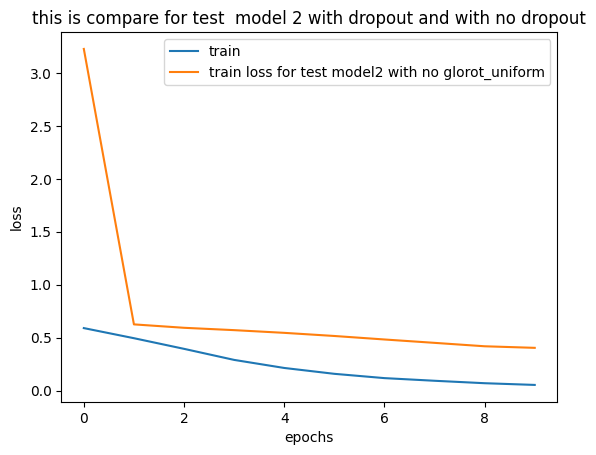

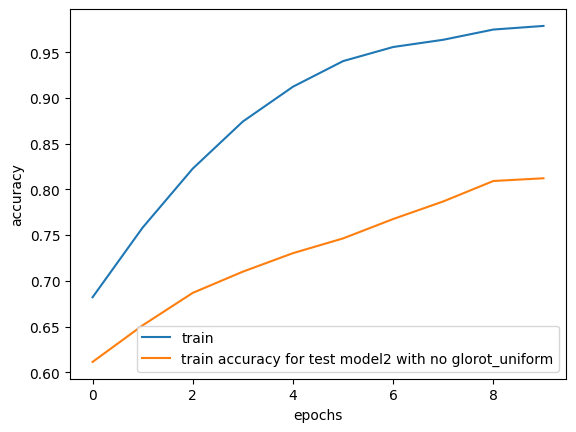

In [68]:
plt.plot(model_fit.history['loss'], label='train')
plt.plot(model_fit_testmodel2_with_glorotnormal.history['loss'], label='train loss for test model2 with no glorot_uniform')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title("this is compare for test  model 2 with dropout and with no dropout")
plt.legend()
plt.show()

plt.plot(model_fit.history['accuracy'], label='train')
plt.plot(model_fit_testmodel2_with_glorotnormal.history['accuracy'], label='train accuracy for test model2 with no glorot_uniform')
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

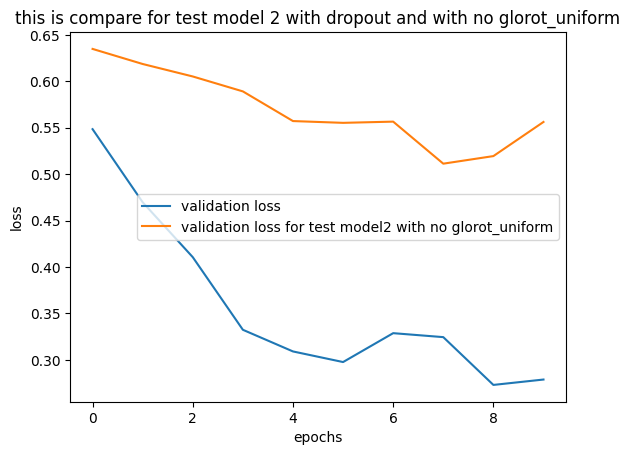

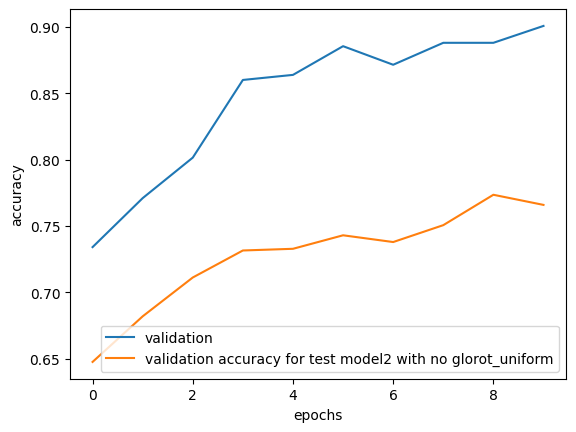

In [69]:
plt.plot(model_fit.history['val_loss'], label='validation loss')
plt.plot(model_fit_testmodel2_with_glorotnormal.history['val_loss'], label='validation loss for test model2 with no glorot_uniform')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title("this is compare for test model 2 with dropout and with no glorot_uniform")
plt.legend()
plt.show()

plt.plot(model_fit.history['val_accuracy'], label='validation')
plt.plot(model_fit_testmodel2_with_glorotnormal.history['val_accuracy'], label='validation accuracy for test model2 with no glorot_uniform')
plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

# Compare three Architecture 

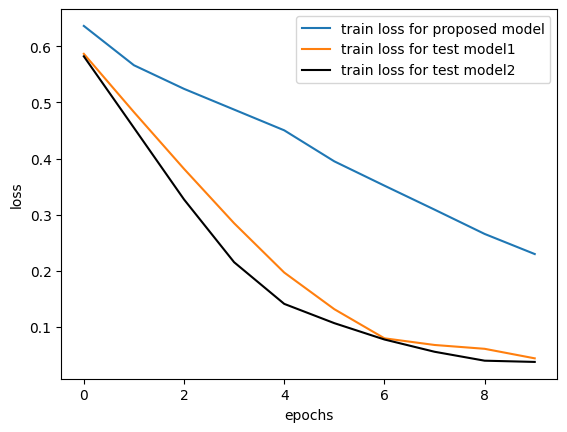

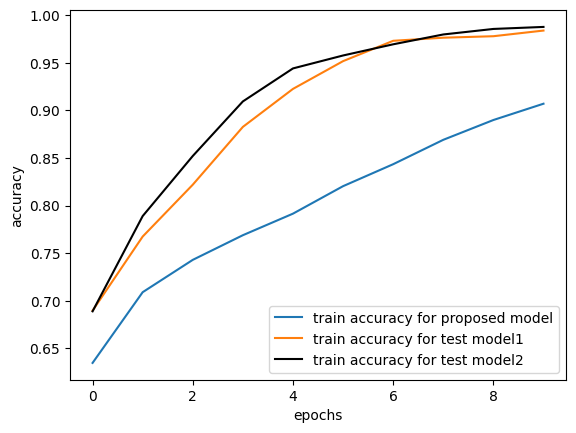

In [56]:
plt.plot(model_fit_proposed.history['loss'], label='train loss for proposed model')
plt.plot(model_fit.history['loss'], label='train loss for test model1')
plt.plot(model_fit2.history['loss'], label='train loss for test model2',c='black')

plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.plot(model_fit_proposed.history['accuracy'], label='train accuracy for proposed model')
plt.plot(model_fit.history['accuracy'], label='train accuracy for test model1')
plt.plot(model_fit2.history['accuracy'], label='train accuracy for test model2', c='black')

plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()

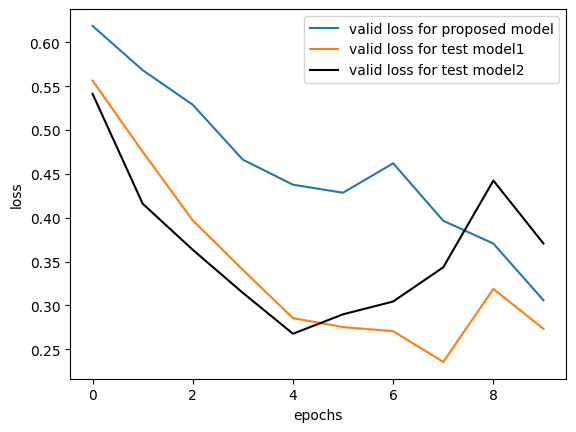

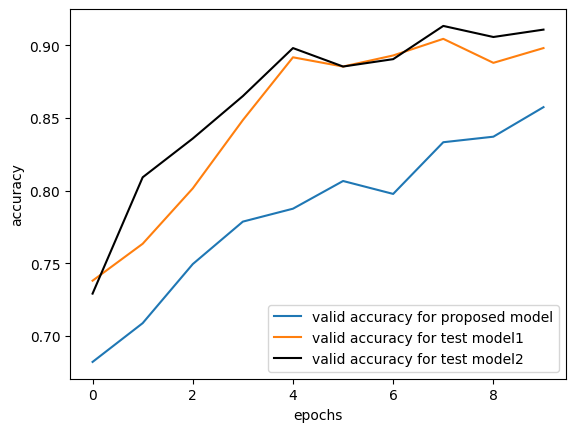

In [114]:
plt.plot(model_fit_proposed.history['val_loss'], label='valid loss for proposed model')
plt.plot(model_fit.history['val_loss'], label='valid loss for test model1')
plt.plot(model_fit2.history['val_loss'], label='valid loss for test model2',c='black')

plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.plot(model_fit_proposed.history['val_accuracy'], label='valid accuracy for proposed model')
plt.plot(model_fit.history['val_accuracy'], label='valid accuracy for test model1')
plt.plot(model_fit2.history['val_accuracy'], label='valid accuracy for test model2', c='black')

plt.ylabel('accuracy')
plt.xlabel('epochs')


plt.legend()
plt.show()